#### Sirve para ver en el momento de comprar, un analisis de los precios minimos de las ultimas horas

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
#Date
from datetime import datetime
import datetime as dt
#Warning
import warnings
warnings.filterwarnings("ignore")
#PLot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="dark", color_codes=True)

from download import data_crypto

In [24]:
def min_max(crypto):
    con = data_crypto.data_crypto()

    params = {"crypto": crypto,
          "days_back": 1,
          "time": '15MINUTE'}

    c_data = con.crypto_download(params)
    #Me agarro la data de las ultimas 6 horas
    c_data_hs = c_data[-21:]
    
    ################################################Chart################################################
    #Grafico el precio del ultimo mes
    fig, axs = plt.subplots(1, 1, figsize=(17,5))
    #Grafico el precio de las ultimas 4 hs
    axs.set_title(f'{crypto} Low & High Price Last 6 Hours')
    print(c_data_hs.index[0])
    axs.set_xlabel(f'Date {c_data_hs.iloc[0,0].strftime("%Y-%m-%d")}')
    axs.set_ylabel(f'{crypto} Price')
    #High Price
    axs.plot(c_data_hs.Date.dt.strftime("%H:%M:%S"), c_data_hs.iloc[:,1], 
             label = f'{crypto} {c_data_hs.columns[1]} Price', color='green')
    #Low Price
    axs.plot(c_data_hs.Date.dt.strftime("%H:%M:%S"), c_data_hs.iloc[:,2], 
             label = f'{crypto} {c_data_hs.columns[2]} Price', color='red')
    axs.legend(loc='best', shadow=True)
    #Valores
    for i,j in zip(c_data_hs.Date.dt.strftime("%H:%M:%S"),c_data_hs.iloc[:,1]):
        axs.annotate(str(j),xy=(i,j))
    for i,j in zip(c_data_hs.Date.dt.strftime("%H:%M:%S"),c_data_hs.iloc[:,2]):
        axs.annotate(str(j),xy=(i,j))
    #Media - Minimo - Maximo
    high_mean = c_data_hs.iloc[:,1].mean()
    high_min = c_data_hs.iloc[:,1].min()
    high_max = c_data_hs.iloc[:,1].max()
    low_mean = c_data_hs.iloc[:,2].mean()
    low_min = c_data_hs.iloc[:,2].min()
    low_max = c_data_hs.iloc[:,2].max()

    col_labels= ['Mean', 'Min', 'Max']
    row_labels= ['High', 'Low']
    table_vals=[[high_mean, high_min, high_max], [low_mean, low_min, low_max]]
    # the rectangle is where I want to place the table
    the_table = plt.table(cellText=table_vals, colWidths = [0.3]*3, rowLabels=row_labels, 
                          colLabels=col_labels, loc='bottom', bbox=[0, -0.5, 0.5, 0.3])
    return(plt.show())

172


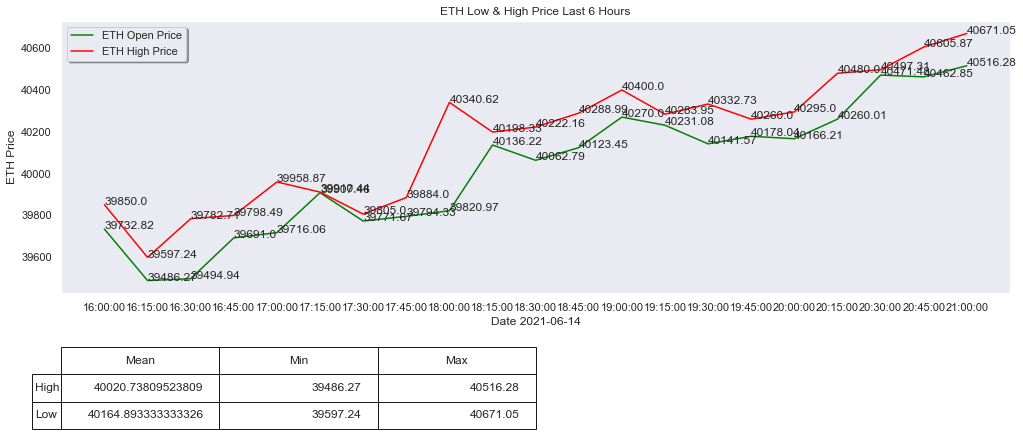

172


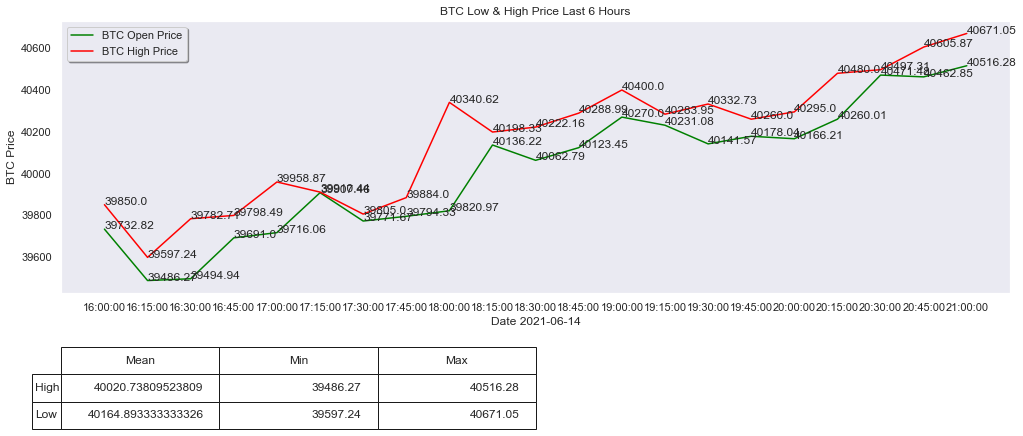

172


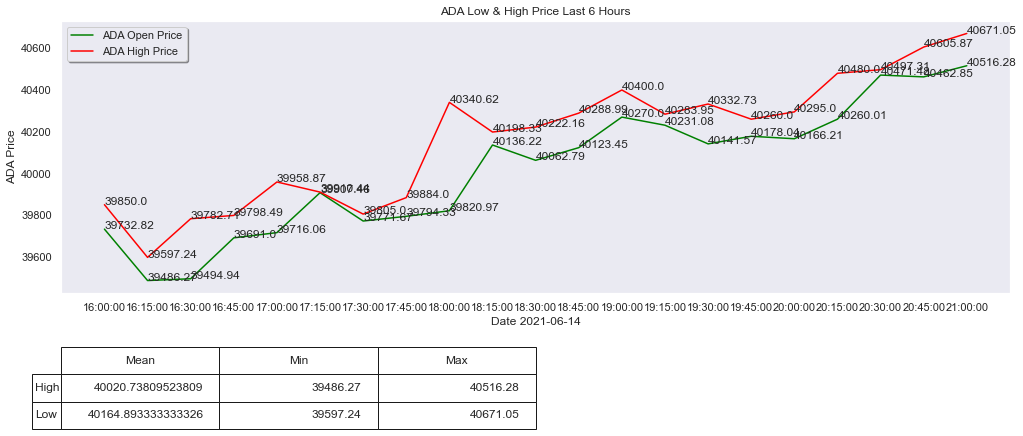

In [25]:
cry = ['ETH', 'BTC', 'ADA']
for i in cry:
    min_max(i)